In [133]:
import sys
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [134]:
file_path = "./dataFiles/MPI/Radix/random/*.cali"
algorithm = "Radix"
input_type = "Random"

In [135]:
all_files = glob(file_path)
print("Length:", len(all_files))

# problem_files = [1, 2, 6]
problem_files = []
files = []

for i in range(len(all_files)):
  if i not in problem_files:
    files.append(all_files[i])

print(files)

print("Problem Files:")
for p in problem_files:
  print(all_files[p])


tk = th.Thicket.from_caliperreader(files)

Length: 28
['./dataFiles/MPI/Radix/random\\16-1048576-0.cali', './dataFiles/MPI/Radix/random\\16-16777216-0.cali', './dataFiles/MPI/Radix/random\\16-262144-0.cali', './dataFiles/MPI/Radix/random\\16-268435456-0.cali', './dataFiles/MPI/Radix/random\\16-4194304-0.cali', './dataFiles/MPI/Radix/random\\16-65536-0.cali', './dataFiles/MPI/Radix/random\\16-67108864-0.cali', './dataFiles/MPI/Radix/random\\2-1048576-0.cali', './dataFiles/MPI/Radix/random\\2-16777216-0.cali', './dataFiles/MPI/Radix/random\\2-262144-0.cali', './dataFiles/MPI/Radix/random\\2-268435456-0.cali', './dataFiles/MPI/Radix/random\\2-4194304-0.cali', './dataFiles/MPI/Radix/random\\2-65536-0.cali', './dataFiles/MPI/Radix/random\\2-67108864-0.cali', './dataFiles/MPI/Radix/random\\4-1048576-0.cali', './dataFiles/MPI/Radix/random\\4-16777216-0.cali', './dataFiles/MPI/Radix/random\\4-262144-0.cali', './dataFiles/MPI/Radix/random\\4-268435456-0.cali', './dataFiles/MPI/Radix/random\\4-4194304-0.cali', './dataFiles/MPI/Radix/rand

In [136]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
30354652,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,4-4194304-0.cali,true,1701509752,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 4194304, 0, 0]",c,RadixSort,MPI,int,4,4194304,Random,4,23,Online
92720547,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,16-4194304-0.cali,true,1701510556,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 4194304, 0, 0]",c,RadixSort,MPI,int,4,4194304,Random,16,23,Online
170064404,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,8-65536-0.cali,true,1701509949,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 65536, 0, 0]",c,RadixSort,MPI,int,4,65536,Random,8,23,Online
822303468,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,8-67108864-0.cali,true,1701509960,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 67108864, 0, 0]",c,RadixSort,MPI,int,4,67108864,Random,8,23,Online
839382668,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,8-262144-0.cali,true,1701509954,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 262144, 0, 0]",c,RadixSort,MPI,int,4,262144,Random,8,23,Online
884775432,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,4-67108864-0.cali,true,1701509772,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 67108864, 0, 0]",c,RadixSort,MPI,int,4,67108864,Random,4,23,Online
1099062401,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,4-1048576-0.cali,true,1701509750,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 1048576, 0, 0]",c,RadixSort,MPI,int,4,1048576,Random,4,23,Online
1286791719,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,16-16777216-0.cali,true,1701511474,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 16777216, 0, 0]",c,RadixSort,MPI,int,4,16777216,Random,16,23,Online
1289844641,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,4-262144-0.cali,true,1701509752,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radixmpi, 262144, 0, 0]",c,RadixSort,MPI,int,4,262144,Random,4,23,Online


In [137]:
# Weak scaling: num_processes vs execution_time
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x0000019585FEB010>, 262144: <thicket.thicket.Thicket object at 0x00000195826E41D0>, 1048576: <thicket.thicket.Thicket object at 0x0000019586871E90>, 4194304: <thicket.thicket.Thicket object at 0x0000019585615B50>, 16777216: <thicket.thicket.Thicket object at 0x000001958623FD10>, 67108864: <thicket.thicket.Thicket object at 0x0000019581C84890>, 268435456: <thicket.thicket.Thicket object at 0x0000019582ABDE10>}


In [138]:
ctk = th.Thicket.concat_thickets(
  thickets=list(gb.values()),
  headers=list(gb.keys()),
  axis="columns",
  metadata_key="mpi.world.size"
)

In [139]:
ctk.dataframe

65536  \
                                                                   nid   
node                                              mpi.world.size         
{'name': 'main', 'type': 'function'}              2                  1   
                                                  4                  1   
                                                  8                  1   
                                                  16                 1   
{'name': 'comm', 'type': 'function'}              2                  3   
                                                  4                  3   
                                                  8                  3   
                                                  16                 3   
{'name': 'MPI_Barrier', 'type': 'function'}       2                  4   
                                                  4                  4   
                                                  8                  4   
                                                  16                 4   
{'name': 'comm_large', 'type': 'function'}        2                 10   
                                                  4                 10   
                                                  8                 10   
                                                  16                10   
{'name': 'MPI_Isend', 'type': 'function'}         2                 11   
                                                  4                 11   
                                                  8                 11   
                                                  16                11   
{'name': 'MPI_Recv', 'type': 'function'}          2                 12   
                                                  4                 12   
                                                  8                 12   
                                                  16                12   
{'name': 'comm_small', 'type': 'function'}        2                  7   
                                                  4                  7   
                                                  8                  7   
                                                  16                 7   
{'name': 'MPI_Isend', 'type': 'function'}         2                  8   
                                                  4                  8   
                                                  8                  8   
                                                  16                 8   
{'name': 'MPI_Recv', 'type': 'function'}          2                  9   
                                                  4                  9   
                                                  8                  9   
                                                  16                 9   
{'name': 'comp', 'type': 'function'}              2                  5   
                                                  4                  5   
                                                  8                  5   
                                                  16                 5   
{'name': 'comp_large', 'type': 'function'}        2                  6   
                                                  4                  6   
                                                  8                  6   
                                                  16                 6   
{'name': 'correctness_check', 'type': 'function'} 2                 13   
                                                  4                 13   
                                                  8                 13   
                                                  16                13   
{'name': 'data_init', 'type': 'function'}         2                  2   
                                                  4                  2   
                                                  8                  2   
                                                  16                 

In [140]:
dropTheseCol = ["nid", "spot.channel",  "Min time/rank", "Max time/rank", "Total time", "Variance time/rank"]
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
dropArr = [("node", "")]

for c in dropTheseCol:
    for s in sizes:
        dropArr.append((s, c))
    

ctk.dataframe = ctk.dataframe.reset_index().drop(dropArr, axis=1)

ctk.dataframe = ctk.dataframe.rename({("name", ""): "name",("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])


ctk.dataframe

65536        262144       1048576  \
                                 Avg time/rank Avg time/rank Avg time/rank   
name              mpi.world.size                                             
main              2                   0.861820      0.596120      1.308089   
                  4                   0.396613      0.381455      0.407321   
                  8                   0.510854      0.496528      0.518565   
                  16                  0.775184      0.761818      0.781281   
comm              2                   0.011342      0.009638      0.028383   
                  4                   0.013397      0.016247      0.029235   
                  8                   0.016354      0.018583      0.030349   
                  16                  0.022383      0.022058      0.040575   
MPI_Barrier       2                   0.001582      0.001018      0.003308   
                  4                   0.001470      0.001371      0.001350   
                  8                   0.003369      0.001543      0.002368   
                  16                  0.006688      0.002622      0.004587   
comm_large        2                   0.006122      0.005803      0.011778   
                  4                   0.009553      0.010031      0.011050   
                  8                   0.009702      0.010414      0.010763   
                  16                  0.010532      0.010601      0.013428   
MPI_Isend         2                   0.002221      0.001947      0.002904   
                  4                   0.003193      0.003870      0.004478   
                  8                   0.003154      0.004109      0.004291   
                  16                  0.003867      0.003913      0.005590   
MPI_Recv          2                   0.001760      0.001741      0.006121   
                  4                   0.002761      0.002769      0.003352   
                  8                   0.003136      0.002861      0.003038   
                  16                  0.002915      0.003091      0.003964   
comm_small        2                   0.003542      0.002730      0.013210   
                  4                   0.002277      0.004753      0.016745   
                  8                   0.003195      0.006542      0.017129   
                  16                  0.005072      0.008750      0.022468   
MPI_Isend         2                   0.000770      0.000041      0.000043   
                  4                   0.000116      0.000104      0.000103   
                  8                   0.000230      0.000202      0.000204   
                  16                  0.000531      0.000518      0.000458   
MPI_Recv          2                   0.002712      0.002637      0.013106   
                  4                   0.002017      0.004524      0.016523   
                  8                   0.002716      0.006097      0.016684   
                  16                  0.004013      0.007727      0.021489   
comp              2                   0.002055      0.007764      0.030667   
                  4                   0.001202      0.004289      0.016680   
                  8                   0.000593      0.002030      0.007627   
                  16                  0.000357      0.001093      0.004283   
comp_large        2                   0.001983      0.007691      0.030585   
                  4                   0.001123      0.004213      0.016601   
                  8                   0.000525      0.001962      0.007554   
                  16                  0.000285      0.001024      0.004209   
correctness_check 2                   0.000118      0.000424      0.001970   
                  4                   0.000061      0.000217      0.000842   
                  8                   0.000036      0.000110      0.000426   
                  16                  0.000021      0.000060      0.000217   
data_init         2                   0.000965      0.003050   

In [141]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
world_size = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
num_values = sorted(ctk.dataframe.columns.tolist())

print(function_names)

{'comm_small', 'MPI_Barrier', 'comm', 'data_init', 'MPI_Recv', 'correctness_check', 'MPI_Isend', 'comm_large', 'comp', 'comp_large', 'main'}


In [151]:
def plot_pandas(df, title, xlabel, ylabel, loglog, legend):
    plot = df.plot(kind="line",
                  marker='o',
                  title=title,
                  xlabel=xlabel,
                  ylabel=ylabel,
                  grid=True,
                  loglog=loglog
                )
    plot.legend(legend)
    return plot

In [143]:
ctk.dataframe.loc['main']

,65536,262144,1048576,4194304,16777216,67108864,268435456
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
mpi.world.size,,,,,,,
2,0.861820,0.596120,1.308089,1.486195,2.314219,4.214144,15.110959
4,0.396613,0.381455,0.407321,0.516210,1.170663,2.809644,10.818402
8,0.510854,0.496528,0.518565,0.595860,0.958830,2.315731,7.527850
16,0.775184,0.761818,0.781281,0.837951,1.130617,4.157185,6.885355


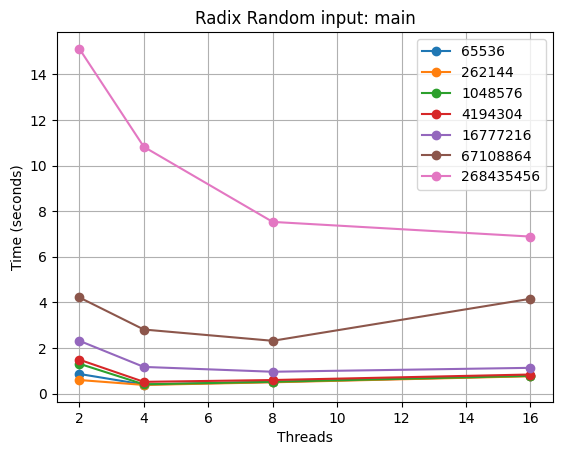

In [152]:
function_names = {'comm', 'data_init', 'comp',  'main'}
function_names = {'main'}

legend = [65536,262144,	1048576,	4194304,	16777216,	67108864,	268435456]

for name in function_names:
  plot_pandas(
      df=ctk.dataframe.loc[name],
      title=f"{algorithm} {input_type} input: {name}",
      xlabel="Threads",
      ylabel="Time (seconds)",
      loglog=False,
      legend=legend
  )

In [145]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

-1.000 main
├─ -1.000 comm
│  ├─ -1.000 MPI_Barrier
│  ├─ -1.000 comm_large
│  │  ├─ -1.000 MPI_Isend
│  │  └─ -1.000 MPI_Recv
│  └─ -1.000 comm_small
│     ├─ -1.000 MPI_Isend
│     └─ -1.000 MPI_Recv
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph

